In [ ]:
#import statements

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Data Overview


In [ ]:
df = pd.read_csv("combined_data.csv", low_memory=False, na_values=['', ' '])

df.shape

(433825, 17)

In [ ]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,212012996,1102,NaN,FRAUD - FALSE PRETENSE / SCHEME,B2,259,0,2020-01-01 00:00:00,2020,1,Wednesday,0,NaN,ALEXANDER ST,42.316942,-71.069912,"(42.3169424347871, -71.0699121273113)"
1,212008096,1107,NaN,FRAUD - IMPERSONATION,A1,118,0,2020-01-01 00:00:00,2020,1,Wednesday,0,NaN,BOYLSTON ST,42.352418,-71.065255,"(42.3524181472861, -71.0652549858121)"
2,202000034,3006,NaN,SICK/INJURED/MEDICAL - PERSON,C6,201,0,2020-01-01 00:00:00,2020,1,Wednesday,0,NaN,W BROADWAY,42.340070,-71.052794,"(42.340069862647, -71.0527942008028)"
3,202007210,1001,NaN,FORGERY / COUNTERFEITING,C6,200,0,2020-01-01 00:00:00,2020,1,Wednesday,0,NaN,ORTON-MAROTTA WAY,42.341288,-71.054679,"(42.3412875043904, -71.054679326494)"
4,202000355,617,NaN,LARCENY THEFT FROM BUILDING,A1,77,0,2020-01-01 00:00:00,2020,1,Wednesday,0,NaN,FRIEND ST,42.361839,-71.059765,"(42.3618385665647, -71.0597648909416)"


In [ ]:
df.describe()

,OFFENSE_CODE,OFFENSE_CODE_GROUP,SHOOTING,YEAR,MONTH,HOUR,UCR_PART,Lat,Long
count,433825.000000,0.0,433825.000000,433825.000000,433825.000000,433825.000000,0.0,4.112140e+05,4.112140e+05
mean,2350.568195,NaN,0.009935,2022.469062,6.426289,12.644912,NaN,4.232296e+01,-7.108351e+01
std,1192.202433,NaN,0.099178,1.660890,3.328813,6.481940,NaN,7.345040e-02,1.152090e-01
min,111.000000,NaN,0.000000,2020.000000,1.000000,0.000000,NaN,1.327276e-07,-7.134947e+01
25%,1102.000000,NaN,0.000000,2021.000000,4.000000,9.000000,NaN,4.229755e+01,-7.109891e+01
50%,3005.000000,NaN,0.000000,2023.000000,6.000000,13.000000,NaN,4.232866e+01,-7.107754e+01
75%,3201.000000,NaN,0.000000,2024.000000,9.000000,18.000000,NaN,4.234893e+01,-7.106096e+01
max,99999.000000,NaN,1.000000,2025.000000,12.000000,23.000000,NaN,4.246141e+01,5.249691e-08


In [ ]:
df.dtypes

,0
INCIDENT_NUMBER,object
OFFENSE_CODE,int64
OFFENSE_CODE_GROUP,float64
OFFENSE_DESCRIPTION,object
DISTRICT,object
REPORTING_AREA,object
SHOOTING,int64
OCCURRED_ON_DATE,object
YEAR,int64
MONTH,int64


In [ ]:
missing_counts = df.isna().sum()

print("Missing values per column:")
print(missing_counts)

Missing values per column:
INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP     433825
OFFENSE_DESCRIPTION         0
DISTRICT                 1879
REPORTING_AREA         100787
SHOOTING                    0
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART               433825
STREET                    681
Lat                     22611
Long                    22611
Location                22611
dtype: int64


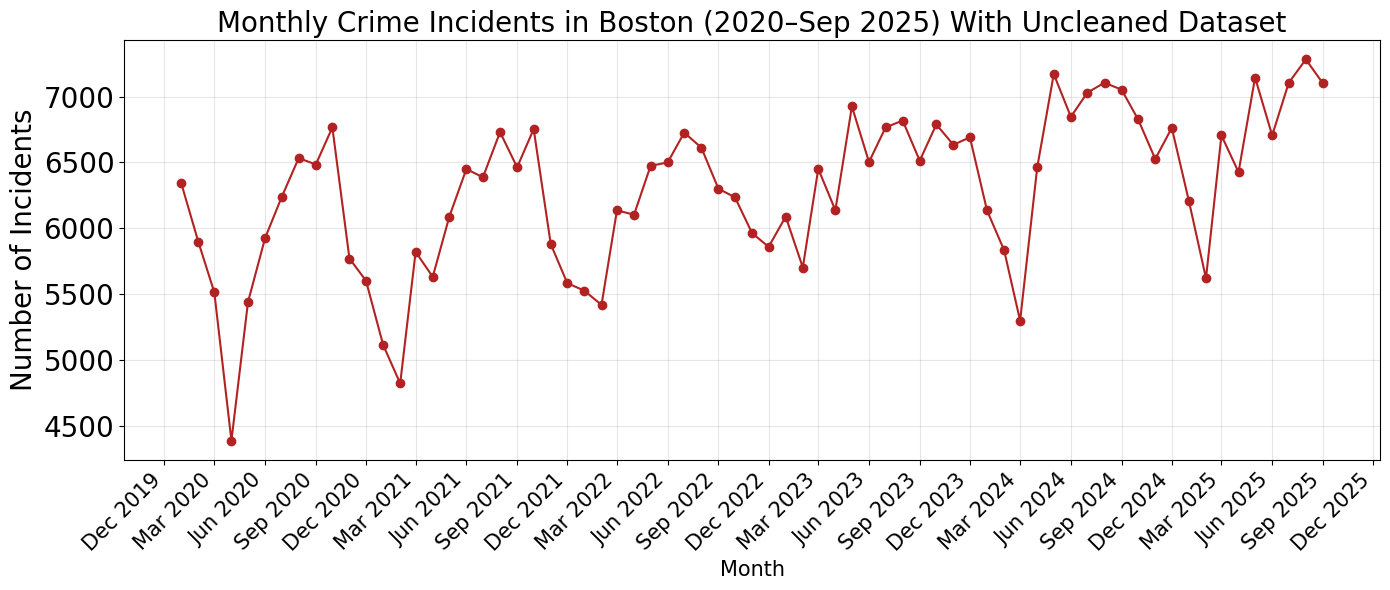

In [ ]:
df_month = df.dropna(subset=['YEAR', 'MONTH'])

# Ensure 'OCCURRED_ON_DATE' is in datetime format and set to the start of the month
df_month['OCCURRED_ON_DATE'] = pd.to_datetime(df_month['OCCURRED_ON_DATE'], errors='coerce').dt.to_period('M').dt.to_timestamp()

# Group by Year and Month and count incidents
monthly = df_month.groupby(['YEAR', 'MONTH']).size().reset_index(name='Incidents')

# Create a YearMonth column for plotting
monthly['YearMonth'] = pd.to_datetime(monthly['YEAR'].astype(str) + '-' + monthly['MONTH'].astype(str) + '-01')

# Ensure the data only goes up to September 2025 (as per previous analysis)
monthly = monthly[monthly['YearMonth'] <= "2025-09-01"]

# --- Plot ---
plt.figure(figsize=(14,6))
plt.plot(monthly['YearMonth'], monthly['Incidents'], marker='o', color="firebrick")

plt.title("Monthly Crime Incidents in Boston (2020–Sep 2025) With Uncleaned Dataset", fontsize=20)
plt.xlabel("Month", fontsize=15)  # Increased font size
plt.ylabel("Number of Incidents", fontsize=20) # Increased font size
plt.grid(alpha=0.3)

# Format x-axis to show months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # e.g., Jan 2024

plt.xticks(rotation=45, ha='right', fontsize=15) # Increased font size for ticks
plt.yticks(fontsize=20) # Increased font size for ticks
plt.tight_layout()
plt.savefig("monthly_incidents.eps", format="eps", dpi=300, bbox_inches="tight")
plt.show()


# Data Preprocessing and Cleaning

In [ ]:
# Drop OFFENSE_CODE_GROUP and UCR_PART columns (empty columns)
cols_to_drop = ["OFFENSE_CODE_GROUP", "UCR_PART"]
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns], errors="ignore")

# Drop rows with missing location information
df = df.dropna(subset=["Location", "DISTRICT"])

# df is now your cleaned dataset
print(f"Cleaned dataset loaded into df, shape = {df.shape}")

Cleaned dataset loaded into df, shape = (410002, 15)


In [ ]:
counts_by_year = df['YEAR'].value_counts().sort_index()
total_count = counts_by_year.sum()

print(counts_by_year)
print("\nTotal incidents:", total_count)

YEAR
2020    68928
2021    67983
2022    70008
2023    72588
2024    74625
2025    55870
Name: count, dtype: int64

Total incidents: 410002


In [ ]:
# Count the number of incidents for each offense description
offense_counts = df['OFFENSE_DESCRIPTION'].value_counts()

# Display the counts
print("Number of incidents per offense description:")
print(offense_counts.head(20))

Number of incidents per offense description:
OFFENSE_DESCRIPTION
INVESTIGATE PERSON                              39418
SICK ASSIST                                     32096
M/V - LEAVING SCENE - PROPERTY DAMAGE           24038
INVESTIGATE PROPERTY                            18996
TOWED MOTOR VEHICLE                             17634
VANDALISM                                       16399
ASSAULT - SIMPLE                                16280
LARCENY SHOPLIFTING                             15774
PROPERTY - LOST/ MISSING                        12193
LARCENY THEFT FROM MV - NON-ACCESSORY           11163
M/V ACCIDENT - PROPERTY DAMAGE                  10285
VERBAL DISPUTE                                   9889
DRUGS - POSSESSION/ SALE/ MANUFACTURING/ USE     9738
LARCENY THEFT FROM BUILDING                      9560
THREATS TO DO BODILY HARM                        9468
ASSAULT - AGGRAVATED                             8859
SICK/INJURED/MEDICAL - PERSON                    8553
LARCENY ALL OTHER

In [ ]:
# List of offense descriptions to drop (unlikely to spillover)
drop_offenses = [
    "SICK ASSIST",
    "SICK/INJURED/MEDICAL - PERSON",
    "TOWED MOTOR VEHICLE",
    "INVESTIGATE PERSON",
    "INVESTIGATE PROPERTY"
]

# drop from df
df = df[~df["OFFENSE_DESCRIPTION"].isin(drop_offenses)].copy()

offense_counts = df['OFFENSE_DESCRIPTION'].value_counts()
print(offense_counts)
print(df.shape)

OFFENSE_DESCRIPTION
M/V - LEAVING SCENE - PROPERTY DAMAGE    24038
VANDALISM                                16399
ASSAULT - SIMPLE                         16280
LARCENY SHOPLIFTING                      15774
PROPERTY - LOST/ MISSING                 12193
                                         ...  
Justifiable Homicide                         2
PROSTITUTION - ASSISTING OR PROMOTING        2
Evidence Tracker Incidents                   1
MANSLAUGHTER - NEGLIGENCE                    1
PRISONER ESCAPE / ESCAPE & RECAPTURE         1
Name: count, Length: 122, dtype: int64
(293305, 15)


In [ ]:
missing_counts = df.isna().sum()

print("Missing values per column:")
print(missing_counts)


Missing values per column:
INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_DESCRIPTION        0
DISTRICT                   0
REPORTING_AREA         66536
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
STREET                   516
Lat                        0
Long                       0
Location                   0
dtype: int64


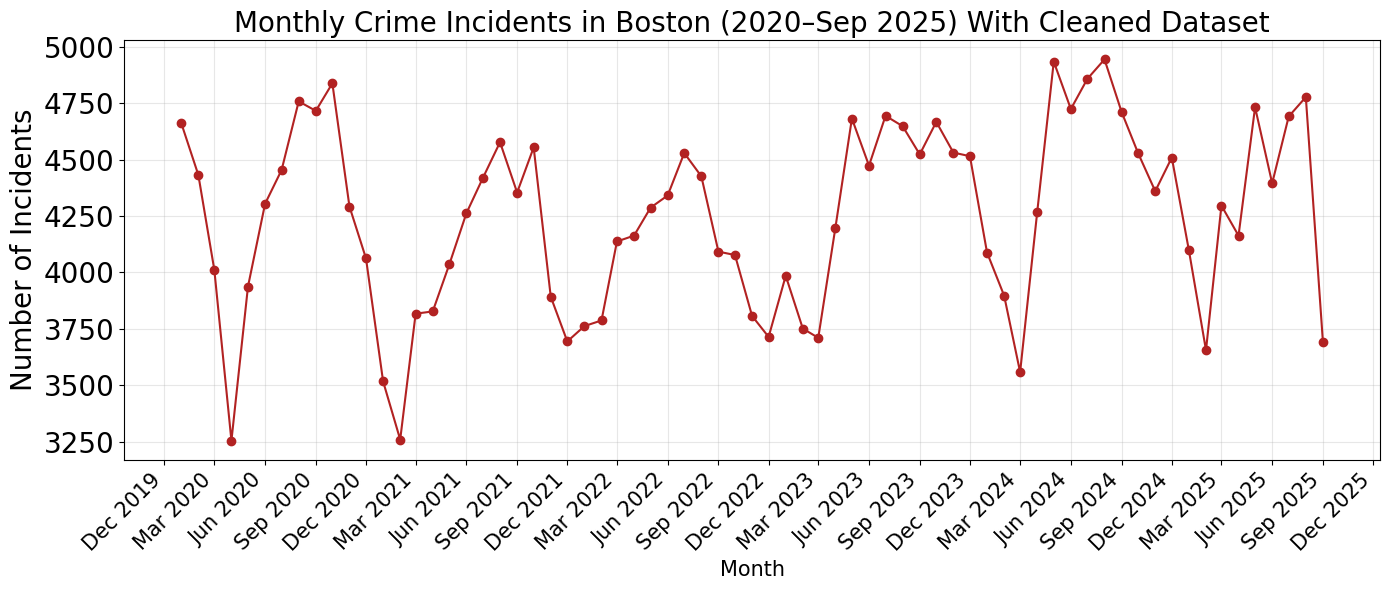

<Figure size 640x480 with 0 Axes>

In [ ]:
df_month = df.dropna(subset=['YEAR', 'MONTH'])

# Ensure 'OCCURRED_ON_DATE' is in datetime format and set to the start of the month
df_month['OCCURRED_ON_DATE'] = pd.to_datetime(df_month['OCCURRED_ON_DATE'], errors='coerce').dt.to_period('M').dt.to_timestamp()

# Group by Year and Month and count incidents
monthly = df_month.groupby(['YEAR', 'MONTH']).size().reset_index(name='Incidents')

# Create a YearMonth column for plotting
monthly['YearMonth'] = pd.to_datetime(monthly['YEAR'].astype(str) + '-' + monthly['MONTH'].astype(str) + '-01')

# Ensure the data only goes up to September 2025 (as per previous analysis)
monthly = monthly[monthly['YearMonth'] <= "2025-09-01"]

# --- Plot ---
plt.figure(figsize=(14,6))
plt.plot(monthly['YearMonth'], monthly['Incidents'], marker='o', color="firebrick")

plt.title("Monthly Crime Incidents in Boston (2020–Sep 2025) With Cleaned Dataset", fontsize=20)
plt.xlabel("Month", fontsize=15)  # Increased font size
plt.ylabel("Number of Incidents", fontsize=20) # Increased font size
plt.grid(alpha=0.3)

# Format x-axis to show months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # e.g., Jan 2024

plt.xticks(rotation=45, ha='right', fontsize=15) # Increased font size for ticks
plt.yticks(fontsize=20) # Increased font size for ticks
plt.tight_layout()
plt.show()
plt.savefig("monthly_incidents.png")

In [ ]:
print(df['YEAR'].min(), df['YEAR'].max())

2020 2025


# Data Transformation

In [ ]:
def parse_dates_multi_utc(col: pd.Series) -> pd.Series:
    s = col.astype(str).str.strip()
    s = (s.str.replace(r"[…]|\.{3}", "", regex=True)
           .str.replace(r"\s+", " ", regex=True))

    # parse with utc=True every time so results are homogeneous tz-aware
    parsed = pd.to_datetime(s, format="%Y-%m-%d", errors="coerce", utc=True)

    for fmt in [
        "%Y-%m-%d %H:%M:%S",
        "%Y-%m-%d %I:%M %p",
        "%m/%d/%Y",
        "%m/%d/%Y %H:%M",
        "%m/%d/%Y %H:%M:%S",
    ]:
        mask = parsed.isna()
        if mask.any():
            parsed.loc[mask] = pd.to_datetime(s[mask], format=fmt, errors="coerce", utc=True)

    # final fallback (dateutil)
    mask = parsed.isna()
    if mask.any():
        parsed.loc[mask] = pd.to_datetime(s[mask], errors="coerce", utc=True)

    return parsed  # dtype should be datetime64[ns, UTC]

df = df.copy()
df['OCCURRED_ON_DATE'] = parse_dates_multi_utc(df['OCCURRED_ON_DATE'])

#  standardize all to UTC and strip time zone info
df['OCCURRED_ON_DATE'] = df['OCCURRED_ON_DATE'].dt.tz_convert('UTC').dt.tz_localize(None)

# compute t since global t0 (in days)
t0 = df['OCCURRED_ON_DATE'].min()
df['t'] = (df['OCCURRED_ON_DATE'] - t0).dt.total_seconds() / 86400.0

# build the nested list
times_by_district = (
    df.dropna(subset=['DISTRICT', 't'])
      .sort_values('t')
      .groupby('DISTRICT')['t']
      .apply(list)
      .to_dict()
)
districts = sorted(times_by_district.keys())
nested_list = [times_by_district[d] for d in districts]
print(districts)

['A1', 'A15', 'A7', 'B2', 'B3', 'C11', 'C6', 'D14', 'D4', 'E13', 'E18', 'E5', 'External', 'Outside of']


In [ ]:
#Roxbury B2, Dorchester C11, South Boston C6
import json

df = df.copy()
df['OCCURRED_ON_DATE'] = parse_dates_multi_utc(df['OCCURRED_ON_DATE'])

#  standardize all to UTC and strip time zone info
df['OCCURRED_ON_DATE'] = df['OCCURRED_ON_DATE'].dt.tz_convert('UTC').dt.tz_localize(None)

cutoff = pd.Timestamp('2025-04-01')
df_recent = df[df['OCCURRED_ON_DATE'] >= cutoff].copy()

# recompute t0 and derived values using only recent data
t0 = df_recent['OCCURRED_ON_DATE'].min()
df_recent['t'] = (df_recent['OCCURRED_ON_DATE'] - t0).dt.total_seconds() / 86400.0

# rebuild nested list by district
times_by_district = (
    df_recent.dropna(subset=['DISTRICT', 't'])
             .sort_values('t')
             .groupby('DISTRICT')['t']
             .apply(list)
             .to_dict()
)

districts = sorted(times_by_district.keys())
print(districts)
nested_list = [times_by_district[d] for d in districts]

#print(df_recent['OCCURRED_ON_DATE'].min(), df_recent['OCCURRED_ON_DATE'].max())
print(nested_list[3])
print(nested_list[6])

with open("data.jsonl", "w") as f:
    json.dump(nested_list[3], f)
    f.write("\n")
    json.dump(nested_list[6], f)
    f.write("\n")


['A1', 'A15', 'A7', 'B2', 'B3', 'C11', 'C6', 'D14', 'D4', 'E13', 'E18', 'E5', 'External']
[0.0, 0.0, 0.0, 0.0, 0.03125, 0.2743055555555556, 0.3472222222222222, 0.40555555555555556, 0.4222222222222222, 0.4222222222222222, 0.5263888888888889, 0.5395833333333333, 0.5819444444444445, 0.6041666666666666, 0.6229166666666667, 0.6388888888888888, 0.65625, 0.6597222222222222, 0.6611111111111111, 0.6784722222222223, 0.6819444444444445, 0.6979166666666666, 0.7916666666666666, 0.8055555555555556, 0.81875, 0.8638888888888889, 0.8798611111111111, 0.9138888888888889, 0.9138888888888889, 1.0, 1.0, 1.2569444444444444, 1.2604166666666667, 1.3083333333333333, 1.4055555555555554, 1.4159722222222222, 1.4805555555555556, 1.5541666666666667, 1.5541666666666667, 1.625, 1.6465277777777778, 1.66875, 1.6715277777777777, 1.6979166666666667, 1.7104166666666667, 1.8243055555555556, 1.9166666666666667, 1.917361111111111, 2.0, 2.0, 2.0, 2.0, 2.0395833333333333, 2.097916666666667, 2.3520833333333333, 2.354166666666666

# Crime Type Spillover Analysis


In [ ]:
df_crime_dorchester = pd.read_csv("crimespilloverDorchester_notsorted.csv")
df_crime_JP = pd.read_csv("crimespilloverJP_notsorted.csv")
df_crime_southBoston = pd.read_csv("crimespilloverSouthBoston_notsorted.csv")
df_crime_southEnd = pd.read_csv("crimespilloverSouthEnd_notsorted.csv")
df_crime_mattapan = pd.read_csv("crimespilloverMattapan_notsorted.csv")


In [ ]:
col_forward = f"Spillover Roxbury to Dorchester"
col_reverse = f"Spillover Dorchester to Roxbury"

print(f"\n===== Dorchester — Top 10 (Roxbury → Dorchester) =====")
if col_forward in df_crime_dorchester.columns:
    display(df_crime_dorchester.sort_values(by=col_forward, ascending=False).head(10))


print(f"\n===== Dorchester — Top 10 (Dorchester → Roxbury) =====")
if col_reverse in df_crime_dorchester.columns:
    display(df_crime_dorchester.sort_values(by=col_reverse, ascending=False).head(10))



===== Dorchester — Top 10 (Roxbury → Dorchester) =====


,Unnamed: 0,Offense,Spillover Roxbury to Dorchester,Spillover Dorchester to Roxbury,CI 95% Roxbury to Dorchester,CI 95% Dorchester to Roxbury
74,74,PROPERTY - LOST THEN LOCATED,0.431,0.349,"[0.029, 0.914]","[0.02, 0.882]"
80,80,ARSON,0.419,0.408,"[0.029, 0.915]","[0.033, 0.903]"
82,82,OPERATING UNDER THE INFLUENCE (OUI) DRUGS,0.419,0.408,"[0.029, 0.915]","[0.033, 0.903]"
81,81,BOMB THREAT,0.415,0.354,"[0.031, 0.907]","[0.021, 0.866]"
83,83,RECOVERED - MV RECOVERED IN BOSTON (STOLEN IN ...,0.411,0.346,"[0.034, 0.897]","[0.023, 0.863]"
69,69,KIDNAPPING/CUSTODIAL KIDNAPPING/ ABDUCTION,0.411,0.339,"[0.035, 0.902]","[0.025, 0.85]"
53,53,FIRE REPORT/ALARM - FALSE,0.410,0.277,"[0.024, 0.92]","[0.015, 0.769]"
64,64,SUICIDE / SUICIDE ATTEMPT,0.344,0.229,"[0.017, 0.867]","[0.008, 0.681]"
66,66,STOLEN PROPERTY - BUYING / RECEIVING / POSSESSING,0.279,0.141,"[0.02, 0.766]","[0.008, 0.394]"
75,75,LARCENY PICK-POCKET,0.274,0.350,"[0.014, 0.769]","[0.015, 0.907]"



===== Dorchester — Top 10 (Dorchester → Roxbury) =====


,Unnamed: 0,Offense,Spillover Roxbury to Dorchester,Spillover Dorchester to Roxbury,CI 95% Roxbury to Dorchester,CI 95% Dorchester to Roxbury
79,79,OTHER OFFENSE,0.231,0.450,"[0.014, 0.677]","[0.042, 0.926]"
77,77,DRUGS - POSSESSION OF DRUG PARAPHANALIA,0.162,0.439,"[0.006, 0.492]","[0.034, 0.929]"
78,78,NOISY PARTY/RADIO-NO ARREST,0.168,0.424,"[0.005, 0.521]","[0.035, 0.926]"
84,84,"MURDER, NON-NEGLIGENT MANSLAUGHTER",0.195,0.423,"[0.012, 0.555]","[0.036, 0.904]"
52,52,PROPERTY - STOLEN THEN RECOVERED,0.218,0.416,"[0.012, 0.604]","[0.034, 0.91]"
80,80,ARSON,0.419,0.408,"[0.029, 0.915]","[0.033, 0.903]"
82,82,OPERATING UNDER THE INFLUENCE (OUI) DRUGS,0.419,0.408,"[0.029, 0.915]","[0.033, 0.903]"
81,81,BOMB THREAT,0.415,0.354,"[0.031, 0.907]","[0.021, 0.866]"
75,75,LARCENY PICK-POCKET,0.274,0.350,"[0.014, 0.769]","[0.015, 0.907]"
74,74,PROPERTY - LOST THEN LOCATED,0.431,0.349,"[0.029, 0.914]","[0.02, 0.882]"


In [ ]:
col_forward = "Spillover Roxbury to JP"
col_reverse = "Spillover JP to Roxbury"

print(f"\n===== JP — Top 10 (Roxbury → JP) =====")
if col_forward in df_crime_JP.columns:
    display(df_crime_JP.sort_values(by=col_forward, ascending=False).head(10))

print(f"\n===== JP — Top 10 (JP → Roxbury) =====")
if col_reverse in df_crime_JP.columns:
    display(df_crime_JP.sort_values(by=col_reverse, ascending=False).head(10))


===== JP — Top 10 (Roxbury → JP) =====


,Unnamed: 0,Offense,Spillover Roxbury to JP,Spillover JP to Roxbury,CI 95% Roxbury to JP,CI 95% JP to Roxbury
53,53,FIRE REPORT/ALARM - FALSE,0.427,0.338,"[0.034, 0.925]","[0.019, 0.857]"
78,78,RECOVERED - MV RECOVERED IN BOSTON (STOLEN IN ...,0.419,0.408,"[0.029, 0.915]","[0.033, 0.903]"
67,67,KIDNAPPING/CUSTODIAL KIDNAPPING/ ABDUCTION,0.419,0.408,"[0.029, 0.915]","[0.033, 0.903]"
76,76,ARSON,0.419,0.408,"[0.029, 0.915]","[0.033, 0.903]"
79,79,FIREARM/WEAPON - LOST,0.419,0.408,"[0.029, 0.915]","[0.033, 0.903]"
77,77,BOMB THREAT,0.419,0.408,"[0.029, 0.915]","[0.033, 0.903]"
72,72,PROPERTY - LOST THEN LOCATED,0.417,0.280,"[0.035, 0.903]","[0.016, 0.785]"
39,39,FRAUD - WELFARE,0.280,0.521,"[0.018, 0.808]","[0.051, 0.955]"
36,36,M/V ACCIDENT - INVOLVING BICYCLE - NO INJURY,0.260,0.165,"[0.01, 0.764]","[0.008, 0.502]"
69,69,M/V PLATES - LOST,0.235,0.134,"[0.02, 0.617]","[0.006, 0.427]"



===== JP — Top 10 (JP → Roxbury) =====


,Unnamed: 0,Offense,Spillover Roxbury to JP,Spillover JP to Roxbury,CI 95% Roxbury to JP,CI 95% JP to Roxbury
71,71,SEARCH WARRANT,0.047,0.530,"[0.003, 0.134]","[0.08, 0.942]"
39,39,FRAUD - WELFARE,0.280,0.521,"[0.018, 0.808]","[0.051, 0.955]"
23,23,VANDALISM,0.029,0.506,"[0.002, 0.105]","[0.028, 0.928]"
75,75,OTHER OFFENSE,0.225,0.461,"[0.014, 0.63]","[0.053, 0.922]"
68,68,WARRANT ARREST - BOSTON WARRANT (MUST BE SUPPL...,0.138,0.429,"[0.006, 0.417]","[0.046, 0.913]"
80,80,"MURDER, NON-NEGLIGENT MANSLAUGHTER",0.195,0.423,"[0.012, 0.555]","[0.036, 0.904]"
60,60,EXTORTION OR BLACKMAIL,0.109,0.420,"[0.005, 0.326]","[0.028, 0.922]"
52,52,PROPERTY - STOLEN THEN RECOVERED,0.218,0.416,"[0.012, 0.604]","[0.034, 0.91]"
64,64,AUTO THEFT - LEASED/RENTED VEHICLE,0.165,0.414,"[0.007, 0.522]","[0.026, 0.918]"
29,29,VIOLATION - CITY ORDINANCE,0.165,0.411,"[0.011, 0.452]","[0.036, 0.914]"


In [ ]:
col_forward = "Spillover Roxbury to South Boston"
col_reverse = "Spillover South Boston to Roxbury"

print(f"\n===== South Boston — Top 10 (Roxbury → South Boston) =====")
if col_forward in df_crime_southBoston.columns:
    display(df_crime_southBoston.sort_values(by=col_forward, ascending=False).head(10))

print(f"\n===== South Boston — Top 10 (South Boston → Roxbury) =====")
if col_reverse in df_crime_southBoston.columns:
    display(df_crime_southBoston.sort_values(by=col_reverse, ascending=False).head(10))


===== South Boston — Top 10 (Roxbury → South Boston) =====


,Unnamed: 0,Offense,Spillover Roxbury to South Boston,Spillover South Boston to Roxbury,CI 95% Roxbury to South Boston,CI 95% South Boston to Roxbury
66,66,STOLEN PROPERTY - BUYING / RECEIVING / POSSESSING,0.457,0.234,"[0.063, 0.919]","[0.016, 0.671]"
78,78,ARSON,0.419,0.408,"[0.029, 0.915]","[0.033, 0.903]"
81,81,FIREARM/WEAPON - LOST,0.419,0.408,"[0.029, 0.915]","[0.033, 0.903]"
64,64,BREAKING AND ENTERING (B&E) MOTOR VEHICLE,0.419,0.408,"[0.029, 0.915]","[0.033, 0.903]"
79,79,BOMB THREAT,0.419,0.408,"[0.029, 0.915]","[0.033, 0.903]"
74,74,PROPERTY - LOST THEN LOCATED,0.419,0.408,"[0.029, 0.915]","[0.033, 0.903]"
69,69,BREAKING AND ENTERING (B&E) MOTOR VEHICLE (NO ...,0.419,0.408,"[0.029, 0.915]","[0.033, 0.903]"
80,80,PROSTITUTION - SOLICITING,0.419,0.408,"[0.029, 0.915]","[0.033, 0.903]"
53,53,FIRE REPORT/ALARM - FALSE,0.412,0.348,"[0.036, 0.891]","[0.03, 0.855]"
42,42,DRUGS - POSSESSION/ SALE/ MANUFACTURING/ USE,0.364,0.048,"[0.126, 0.652]","[0.007, 0.118]"



===== South Boston — Top 10 (South Boston → Roxbury) =====


,Unnamed: 0,Offense,Spillover Roxbury to South Boston,Spillover South Boston to Roxbury,CI 95% Roxbury to South Boston,CI 95% South Boston to Roxbury
39,39,FRAUD - WELFARE,0.280,0.521,"[0.018, 0.808]","[0.051, 0.955]"
77,77,DRUGS - POSSESSION OF DRUG PARAPHANALIA,0.162,0.439,"[0.006, 0.492]","[0.034, 0.929]"
75,75,LARCENY PICK-POCKET,0.291,0.423,"[0.017, 0.783]","[0.03, 0.938]"
63,63,SUICIDE / SUICIDE ATTEMPT,0.347,0.421,"[0.014, 0.857]","[0.027, 0.936]"
29,29,VIOLATION - CITY ORDINANCE,0.165,0.411,"[0.011, 0.452]","[0.036, 0.914]"
64,64,BREAKING AND ENTERING (B&E) MOTOR VEHICLE,0.419,0.408,"[0.029, 0.915]","[0.033, 0.903]"
81,81,FIREARM/WEAPON - LOST,0.419,0.408,"[0.029, 0.915]","[0.033, 0.903]"
69,69,BREAKING AND ENTERING (B&E) MOTOR VEHICLE (NO ...,0.419,0.408,"[0.029, 0.915]","[0.033, 0.903]"
74,74,PROPERTY - LOST THEN LOCATED,0.419,0.408,"[0.029, 0.915]","[0.033, 0.903]"
78,78,ARSON,0.419,0.408,"[0.029, 0.915]","[0.033, 0.903]"


In [ ]:
col_forward = "Spillover Roxbury to South End"
col_reverse = "Spillover South End to Roxbury"

print(f"\n===== South End — Top 10 (Roxbury → South End) =====")
if col_forward in df_crime_southEnd.columns:
    display(df_crime_southEnd.sort_values(by=col_forward, ascending=False).head(10))

print(f"\n===== South End — Top 10 (South End → Roxbury) =====")
if col_reverse in df_crime_southEnd.columns:
    display(df_crime_southEnd.sort_values(by=col_reverse, ascending=False).head(10))


===== South End — Top 10 (Roxbury → South End) =====


,Unnamed: 0,Offense,Spillover Roxbury to South End,Spillover South End to Roxbury,CI 95% Roxbury to South End,CI 95% South End to Roxbury
7,7,LARCENY SHOPLIFTING,0.642,0.012,"[0.396, 0.908]","[0.0, 0.049]"
54,54,FIRE REPORT/ALARM - FALSE,0.524,0.166,"[0.049, 0.966]","[0.011, 0.498]"
52,52,SERVICE TO OTHER AGENCY,0.436,0.049,"[0.105, 0.882]","[0.002, 0.159]"
65,65,BREAKING AND ENTERING (B&E) MOTOR VEHICLE,0.419,0.408,"[0.029, 0.915]","[0.033, 0.903]"
84,84,TRUANCY / RUNAWAY,0.419,0.408,"[0.029, 0.915]","[0.033, 0.903]"
85,85,FIREARM/WEAPON - ACCIDENTAL INJURY / DEATH,0.419,0.408,"[0.029, 0.915]","[0.033, 0.903]"
81,81,ARSON,0.419,0.408,"[0.029, 0.915]","[0.033, 0.903]"
83,83,OPERATING UNDER THE INFLUENCE (OUI) DRUGS,0.418,0.335,"[0.032, 0.899]","[0.022, 0.817]"
74,74,PROPERTY - LOST THEN LOCATED,0.414,0.358,"[0.033, 0.915]","[0.021, 0.899]"
80,80,LARCENY PURSE SNATCH - NO FORCE,0.413,0.279,"[0.033, 0.893]","[0.018, 0.712]"



===== South End — Top 10 (South End → Roxbury) =====


,Unnamed: 0,Offense,Spillover Roxbury to South End,Spillover South End to Roxbury,CI 95% Roxbury to South End,CI 95% South End to Roxbury
73,73,SEARCH WARRANT,0.047,0.530,"[0.003, 0.134]","[0.08, 0.942]"
40,40,FRAUD - WELFARE,0.280,0.521,"[0.018, 0.808]","[0.051, 0.955]"
78,78,NOISY PARTY/RADIO-NO ARREST,0.168,0.424,"[0.005, 0.521]","[0.035, 0.926]"
65,65,BREAKING AND ENTERING (B&E) MOTOR VEHICLE,0.419,0.408,"[0.029, 0.915]","[0.033, 0.903]"
84,84,TRUANCY / RUNAWAY,0.419,0.408,"[0.029, 0.915]","[0.033, 0.903]"
81,81,ARSON,0.419,0.408,"[0.029, 0.915]","[0.033, 0.903]"
85,85,FIREARM/WEAPON - ACCIDENTAL INJURY / DEATH,0.419,0.408,"[0.029, 0.915]","[0.033, 0.903]"
79,79,OTHER OFFENSE,0.239,0.373,"[0.016, 0.678]","[0.025, 0.883]"
74,74,PROPERTY - LOST THEN LOCATED,0.414,0.358,"[0.033, 0.915]","[0.021, 0.899]"
30,30,VIOLATION - CITY ORDINANCE,0.177,0.355,"[0.008, 0.524]","[0.052, 0.825]"


In [ ]:
col_forward = "Spillover Roxbury to Mattapan"
col_reverse = "Spillover Mattapan to Roxbury"

print(f"\n===== Mattapan — Top 10 (Roxbury → Mattapan) =====")
if col_forward in df_crime_mattapan.columns:
    display(df_crime_mattapan.sort_values(by=col_forward, ascending=False).head(10))

print(f"\n===== Mattapan — Top 10 (Mattapan → Roxbury) =====")
if col_reverse in df_crime_mattapan.columns:
    display(df_crime_mattapan.sort_values(by=col_reverse, ascending=False).head(10))


===== Mattapan — Top 10 (Roxbury → Mattapan) =====


,Unnamed: 0,Offense,Spillover Roxbury to Mattapan,Spillover Mattapan to Roxbury,CI 95% Roxbury to Mattapan,CI 95% Mattapan to Roxbury
65,65,BREAKING AND ENTERING (B&E) MOTOR VEHICLE,0.432,0.191,"[0.024, 0.953]","[0.01, 0.571]"
75,75,PROPERTY - LOST THEN LOCATED,0.419,0.408,"[0.029, 0.915]","[0.033, 0.903]"
83,83,FIREARM/WEAPON - LOST,0.419,0.408,"[0.029, 0.915]","[0.033, 0.903]"
81,81,ARSON,0.416,0.277,"[0.033, 0.922]","[0.016, 0.777]"
70,70,BREAKING AND ENTERING (B&E) MOTOR VEHICLE (NO ...,0.407,0.221,"[0.034, 0.894]","[0.014, 0.642]"
68,68,VAL - OPERATING W/O AUTHORIZATION LAWFUL,0.398,0.143,"[0.055, 0.867]","[0.011, 0.355]"
40,40,FRAUD - WELFARE,0.387,0.431,"[0.037, 0.865]","[0.038, 0.895]"
64,64,SUICIDE / SUICIDE ATTEMPT,0.347,0.421,"[0.014, 0.857]","[0.027, 0.936]"
82,82,INTIMIDATING WITNESS,0.345,0.341,"[0.022, 0.846]","[0.021, 0.845]"
57,57,RECOVERED - MV RECOVERED IN BOSTON (STOLEN OUT...,0.330,0.075,"[0.069, 0.727]","[0.003, 0.232]"



===== Mattapan — Top 10 (Mattapan → Roxbury) =====


,Unnamed: 0,Offense,Spillover Roxbury to Mattapan,Spillover Mattapan to Roxbury,CI 95% Roxbury to Mattapan,CI 95% Mattapan to Roxbury
80,80,OTHER OFFENSE,0.235,0.528,"[0.015, 0.693]","[0.084, 0.948]"
78,78,DRUGS - POSSESSION OF DRUG PARAPHANALIA,0.162,0.439,"[0.006, 0.492]","[0.034, 0.929]"
40,40,FRAUD - WELFARE,0.387,0.431,"[0.037, 0.865]","[0.038, 0.895]"
37,37,M/V ACCIDENT - INVOLVING BICYCLE - NO INJURY,0.237,0.430,"[0.011, 0.71]","[0.03, 0.943]"
54,54,M/V ACCIDENT - INVOLVING PEDESTRIAN - NO INJURY,0.126,0.429,"[0.006, 0.393]","[0.031, 0.914]"
64,64,SUICIDE / SUICIDE ATTEMPT,0.347,0.421,"[0.014, 0.857]","[0.027, 0.936]"
60,60,EXTORTION OR BLACKMAIL,0.109,0.420,"[0.005, 0.326]","[0.028, 0.922]"
66,66,AUTO THEFT - LEASED/RENTED VEHICLE,0.165,0.414,"[0.007, 0.522]","[0.026, 0.918]"
75,75,PROPERTY - LOST THEN LOCATED,0.419,0.408,"[0.029, 0.915]","[0.033, 0.903]"
83,83,FIREARM/WEAPON - LOST,0.419,0.408,"[0.029, 0.915]","[0.033, 0.903]"
